In [1]:
import matplotlib.pyplot as plt
import torch

In [2]:
from torch.utils.data import DataLoader
from torch.utils.data.sampler import RandomSampler
from torchvision.datasets import MNIST

# Flatten the images into a vector
# flatten = lambda x: ToTensor()(x).view(28**2)

from ddpm import preprocess, train_ddpm

# Define the train and test sets
dset_train = MNIST("./", train=True,  transform=preprocess, download=True)
dset_test  = MNIST("./", train=False, transform=preprocess)

batch_size = 128
eval_batch_size = 200
# The loaders perform the actual work
train_loader = DataLoader(dset_train, batch_size=batch_size,
                          sampler=RandomSampler(dset_train))
test_loader  = DataLoader(dset_test, batch_size=eval_batch_size,
                          sampler=RandomSampler(dset_test))

In [3]:
next(iter(train_loader))[0][0].shape

torch.Size([1, 28, 28])

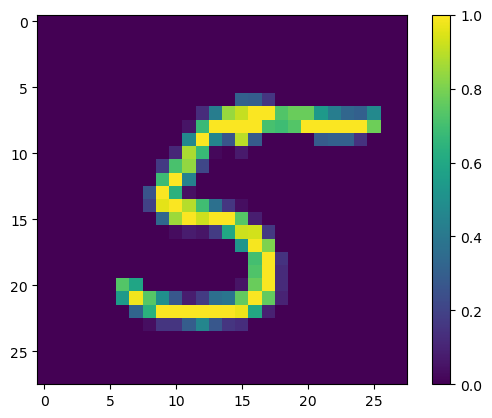

In [4]:
im = torch.swapaxes(next(iter(train_loader))[0][0], 0, 2)
im = torch.swapaxes(im, 0, 1).numpy().squeeze()
plt.imshow((im+1)/2)
plt.colorbar()

In [5]:
train_ddpm("MNIST", train_loader, test_loader, epochs=100, lr=2e-4)

Epoch 1
-------------------------------
loss: 96.658356  [  128/60000]


KeyboardInterrupt: 